# Backtest Example Notebook

### This notebook contains an example on how to define and backtest a trading strategy with the sanpy backtesting functionality.

A backtest is simply a way of evaluating a given trading strategy on historical data. In this example we will use a simple moving average crossover strategy with a 5 day and a 20 day moving average.

PLEASE NOTE: This is not financial advice. The strategy used here is just used as an example. In no way do we guarantee that this particular trading strategie works, nor should any backtest be seen as a guarantee for future performance.

In [5]:
import san
from san.backtest import Backtest
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

In [6]:
# Loading Bitcoin price data via the sanpy module

data = san.get("ohlcv/bitcoin", from_date="2018-01-01", to_date="2020-02-01")

In [13]:
data

,openPriceUsd,closePriceUsd,highPriceUsd,lowPriceUsd,volume,marketcap,returns,ma5,ma20
datetime,,,,,,,,,
2018-01-20 00:00:00+00:00,11656.200000,12899.200000,13103.000000,11656.200000,1.180170e+10,2.169076e+11,0.111291,11732.120000,14180.570000
2018-01-21 00:00:00+00:00,12889.200000,11600.100000,12895.900000,11288.200000,9.935180e+09,1.950895e+11,-0.100712,11754.040000,14077.715000
2018-01-22 00:00:00+00:00,11633.100000,10931.400000,11966.400000,10240.200000,1.053740e+10,1.838664e+11,-0.057646,11702.600000,13875.180000
2018-01-23 00:00:00+00:00,10944.500000,10868.400000,11377.600000,10129.700000,9.660610e+09,1.828303e+11,-0.005763,11581.300000,13658.550000
2018-01-24 00:00:00+00:00,10903.400000,11205.200000,11501.400000,10639.800000,9.444170e+09,1.885154e+11,0.030989,11500.860000,13438.850000
...,...,...,...,...,...,...,...,...,...
2020-01-28 00:00:00+00:00,8910.754427,9357.470379,9358.590317,8908.446929,3.443335e+10,1.701852e+11,0.050242,8735.480289,8576.162320
2020-01-29 00:00:00+00:00,9380.918808,9316.629504,9400.564789,9269.996022,3.068260e+10,1.694610e+11,-0.004365,8909.719334,8648.040219
2020-01-30 00:00:00+00:00,9308.646685,9508.993595,9551.767003,9235.213222,3.237879e+10,1.729786e+11,0.020647,9137.948498,8715.162191


In [63]:
# Calculating returns (daily percent change in price)
returns = data.closePriceUsd.pct_change().dropna()


# Define moving averages
ma5 = data.closePriceUsd.rolling(5).mean().dropna()
ma20 = data.closePriceUsd.rolling(20).mean().dropna()


In [64]:
returns

datetime
2018-03-19 00:00:00+00:00    0.049488
2018-03-20 00:00:00+00:00    0.032769
2018-03-21 00:00:00+00:00    0.001774
2018-03-22 00:00:00+00:00   -0.022489
2018-03-23 00:00:00+00:00    0.017317
                               ...   
2020-01-28 00:00:00+00:00    0.050242
2020-01-29 00:00:00+00:00   -0.004365
2020-01-30 00:00:00+00:00    0.020647
2020-01-31 00:00:00+00:00   -0.016665
2020-02-01 00:00:00+00:00    0.004529
Name: closePriceUsd, Length: 685, dtype: float64

In [55]:
ma5

datetime
2018-03-22 00:00:00+00:00    8685.110000
2018-03-23 00:00:00+00:00    8816.298000
2018-03-24 00:00:00+00:00    8823.792000
2018-03-25 00:00:00+00:00    8740.254000
2018-03-26 00:00:00+00:00    8596.278000
                                ...     
2020-01-28 00:00:00+00:00    8735.480289
2020-01-29 00:00:00+00:00    8909.719334
2020-01-30 00:00:00+00:00    9137.948498
2020-01-31 00:00:00+00:00    9288.688404
2020-02-01 00:00:00+00:00    9385.299642
Name: closePriceUsd, Length: 682, dtype: float64

In [56]:
ma20

datetime
2018-04-06 00:00:00+00:00    7809.075500
2018-04-07 00:00:00+00:00    7743.446000
2018-04-08 00:00:00+00:00    7663.089500
2018-04-09 00:00:00+00:00    7555.952500
2018-04-10 00:00:00+00:00    7451.226500
                                ...     
2020-01-28 00:00:00+00:00    8576.162320
2020-01-29 00:00:00+00:00    8648.040219
2020-01-30 00:00:00+00:00    8715.162191
2020-01-31 00:00:00+00:00    8780.811790
2020-02-01 00:00:00+00:00    8840.830858
Name: closePriceUsd, Length: 667, dtype: float64

Now we define the trades. In this case every time the 5 day moving average is above the 20 day moving average. 

Alternatively the trades could also be defined as `1` for BUY and `0` for SELL. Two ones in a row represent holding for two days. 

Since the backtest calculates the performance by multiplying the returns by the trade, it is also possible to specify shorting as a `-1` and a 2x leverage as a `2`.

In [16]:
trades = ma5 > ma20

In [57]:
trades

datetime
2018-01-20 00:00:00+00:00    False
2018-01-21 00:00:00+00:00    False
2018-01-22 00:00:00+00:00    False
2018-01-23 00:00:00+00:00    False
2018-01-24 00:00:00+00:00    False
                             ...  
2020-01-28 00:00:00+00:00     True
2020-01-29 00:00:00+00:00     True
2020-01-30 00:00:00+00:00     True
2020-01-31 00:00:00+00:00     True
2020-02-01 00:00:00+00:00     True
Length: 743, dtype: bool

The `Backtest` object needs at least the returns of the traded asset and the trades as an input. 
Optionally you can specify transaction costs per trade, the amount of your portfolio you want to invest and whether or not you want the backtest to have a lag. A lag is essential to avoid biases since a buy signal based on today's returns should only be executed tomorrow. The is included by default setting.

In [11]:
back_test = Backtest(
    returns,
    trades,
    lagged=True,
    transaction_cost = 0.003,
    percent_invested_per_trade = 1
)

In [59]:
# Generate a summary of the backtest
back_test.summary()

Returns in Percent:  21.66
Returns Benchmark in Percent:  -27.18
Annualized Returns in Percent:  9.63
Annualized Sharpe Raito:  0.44
Number of Trades:  46


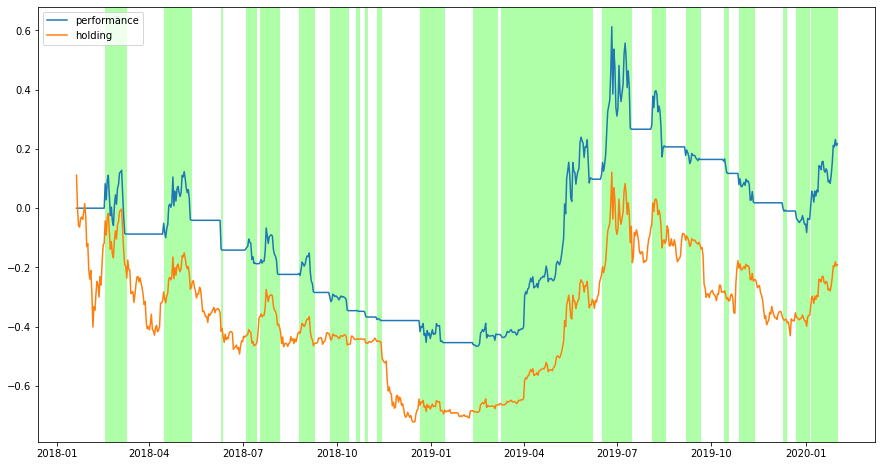

In [60]:
# Plot the performance of the strategy against simply holding the asset
back_test.plot_backtest(viz='hodl')